In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Input path

In [ ]:
input_path = "/content/drive/MyDrive/ML/Data/Engineered/test/"

Initialize

In [ ]:
!git clone --branch master https://github.com/tuanha888/weather-events-predicting.git

!pip install netCDF4
!pip install cartopy
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

%cd /content/weather-events-predicting/
from climatenet.models import CGNet
import torch
from climatenet.utils.utils import Config
from climatenet.utils.data import ClimateDatasetLabeled
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def map_image_globe(ds,lon=-80, lat=35, timesteps=[0,4,8,12]):

    p1 = ds.plot(
      transform=ccrs.PlateCarree(),
      subplot_kws={"projection": ccrs.Orthographic(-80, lat)},
      aspect = 1.3, size = 4
    )
    p2 = ds.plot(
      transform=ccrs.PlateCarree(),
      subplot_kws={"projection": ccrs.Orthographic(100, lat)},
      aspect = 1.3, size = 4
    )
    ax1 = p1.axes
    ax1.coastlines()
    ax1.gridlines()
    ax2 = p2.axes
    ax2.coastlines()
    ax2.gridlines()
    plt.draw()

    return

def map_image_flatten(ds, save_path= None, lon=-80, lat=35):

    p = ds.plot(
      transform=ccrs.PlateCarree(),
      subplot_kws={"projection": ccrs.PlateCarree()},
      aspect = 1.3, size = 6,
      add_colorbar=False
    )
    ax = p.axes
    ax.coastlines()
    ax.gridlines()
    plt.draw()
    if save_path is not None:
      plt.savefig(save_path, dpi=300, bbox_inches='tight')
      plt.close()

    return
weighted_jaccard_loss_path = "./models/1. Weighted Jaccard-loss/"
jc_model = CGNet(model_path = weighted_jaccard_loss_path)
jc_model.network.to(device)
jc_input = ClimateDatasetLabeled(path=input_path, config = Config(weighted_jaccard_loss_path + "config.json"))
cross_entropy_loss_path = "./models/2. Weighted Cross-entropy/"
ce_model = CGNet(model_path = cross_entropy_loss_path)
ce_model.network.to(device)
ce_input = ClimateDatasetLabeled(path=input_path, config = Config(cross_entropy_loss_path + "config.json"))

fatal: destination path 'weather-events-predicting' already exists and is not an empty directory.
/content/weather-events-predicting


Weighted Jaccard loss prediction and visualization

mkdir: cannot create directory ‘images’: File exists


100%|██████████| 16/16 [02:33<00:00,  9.59s/it]


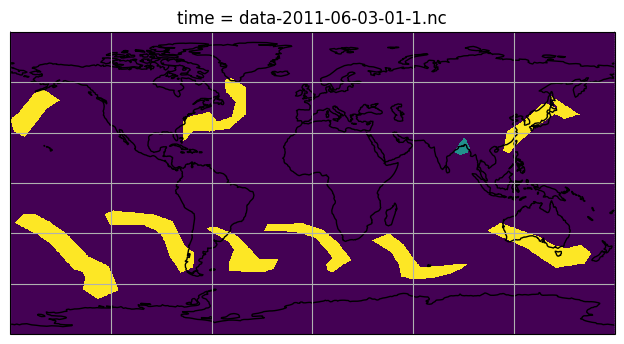

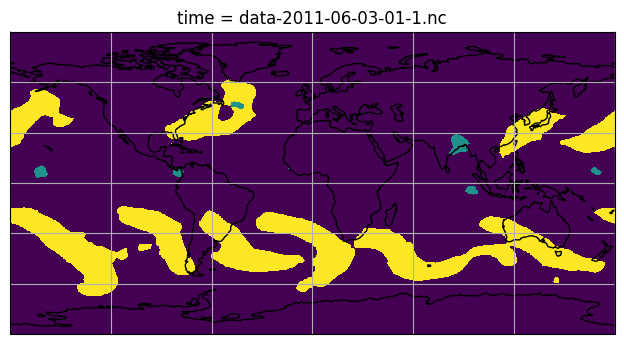

In [ ]:
!mkdir images
def weighted_jc_predict_visualize():
  outputs = jc_model.predict(jc_input)
  for i in range(int(outputs.sizes['time']/2)):
    map_image_flatten(outputs[i], save_path="images/"+ str(i)+ ".png")
  map_image_flatten(xr.open_mfdataset(input_path + "*.nc").isel(time=1)['LABELS'])
  map_image_flatten(outputs[1])
weighted_jc_predict_visualize()

Weighted cross-entropy predict and visualize

In [ ]:
def weighted_ce_predict_visualize():
  outputs = ce_model.predict(ce_input)
  for i in range(int(outputs.sizes['time']/2)):
    map_image_flatten(outputs[i], save_path="images/"+ str(i)+ ".png")
  map_image_flatten(xr.open_mfdataset(input_path + "*.nc").isel(time=1)['LABELS'])
  map_image_flatten(outputs[1])
weighted_ce_predict_visualize()

In [ ]:
%cd images
import subprocess

frame_rate = 10
input_pattern = '%d.png'


output_file = 'output.mp4'

output_width = 480

command = f'ffmpeg -framerate {frame_rate} -i {input_pattern} -c:v libx264 -pix_fmt yuv420p -vf "scale={output_width}:-1" {output_file}'
subprocess.call(command, shell=True)


0

In [ ]:
from IPython.display import HTML
from base64 import b64encode

# Set the name of the video file
video_file = 'output.mp4'

# Function to display video in Colab
def display_video(file_path):
    video_encoded = b64encode(open(file_path, "rb").read()).decode("ascii")
    video_tag = f'<video controls src="data:video/mp4;base64,{video_encoded}">'
    return HTML(video_tag)

# Display the video
display_video(video_file)